### Importing libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import Week
import seaborn as sns
import datetime as dt

### Displays every columns in a dataset


In [2]:
pd.pandas.set_option('display.max_columns',None)

### Reading the csv file


In [3]:
dataset=pd.read_csv('currency exchange_rates.csv',parse_dates=['date'])
print(dataset.head(5))

   Unnamed: 0     Country/Currency currency       value       date
0           0     Australia Dollar      AUD    1.581627 2021-12-17
1           1  Great Britain Pound      GBP    0.851619 2021-12-17
2           2                 Euro      EUR    1.000000 2021-12-17
3           3            Japan Yen      JPY  128.301759 2021-12-17
4           4    Switzerland Franc      CHF    1.041015 2021-12-17


### Types of features 


In [4]:
print(dataset.dtypes)

Unnamed: 0                   int64
Country/Currency            object
currency                    object
value                      float64
date                datetime64[ns]
dtype: object


### Detecting duplicate rows


In [5]:
duplicate_rows_df = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


### Detecting the missing values


In [6]:
print(dataset.isnull().sum())

Unnamed: 0          0
Country/Currency    0
currency            0
value               0
date                0
dtype: int64


### Delete a unnamed column


In [7]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)
print(dataset.head(5))
print(dataset)

      Country/Currency currency       value       date
0     Australia Dollar      AUD    1.581627 2021-12-17
1  Great Britain Pound      GBP    0.851619 2021-12-17
2                 Euro      EUR    1.000000 2021-12-17
3            Japan Yen      JPY  128.301759 2021-12-17
4    Switzerland Franc      CHF    1.041015 2021-12-17
                  Country/Currency currency         value       date
0                 Australia Dollar      AUD      1.581627 2021-12-17
1              Great Britain Pound      GBP      0.851619 2021-12-17
2                             Euro      EUR      1.000000 2021-12-17
3                        Japan Yen      JPY    128.301759 2021-12-17
4                Switzerland Franc      CHF      1.041015 2021-12-17
...                            ...      ...           ...        ...
42879  United Arab Emirates Dirham      AED      3.533471 2022-09-27
42880                 Vanuatu Vatu      VUV    114.443646 2022-09-27
42881                 Vietnam Dong      VND  2282

### Statistical overview of data


In [8]:
print(dataset.describe())

              value
count  42884.000000
mean    1558.392087
std     5301.924443
min        0.297793
25%        3.946621
50%       31.425560
75%      398.816981
max    48463.030170


### Creating a month column and ploting them


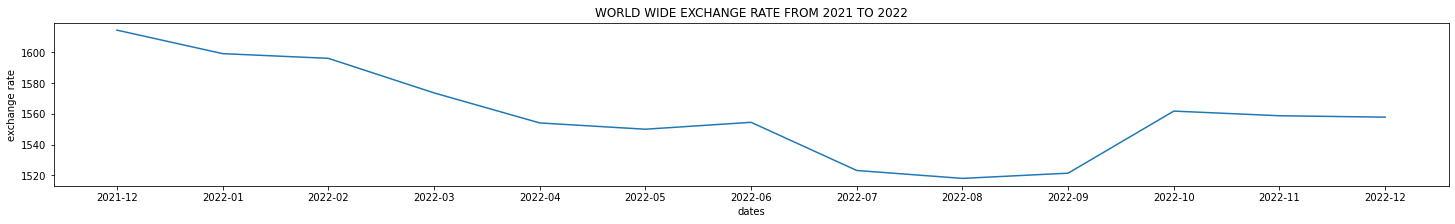

In [9]:
dataset['month'] = dataset['date'].dt.strftime('%Y-%m')
month_average = dataset.groupby(['month']).mean()
plt.figure(figsize=(25,3))
plt.plot(month_average.index,month_average['value'])
plt.xlabel('dates')
plt.ylabel('exchange rate')
plt.title('WORLD WIDE EXCHANGE RATE FROM 2021 TO 2022')
plt.show()

In [10]:
month_average

,value
month,
2021-12,1614.553378
2022-01,1599.253359
2022-02,1596.193160
2022-03,1573.708748
2022-04,1554.149810
2022-05,1550.057746
2022-06,1554.554608
2022-07,1523.205949
2022-08,1518.057079


In [11]:
print(dataset)

                  Country/Currency currency         value       date    month
0                 Australia Dollar      AUD      1.581627 2021-12-17  2021-12
1              Great Britain Pound      GBP      0.851619 2021-12-17  2021-12
2                             Euro      EUR      1.000000 2021-12-17  2021-12
3                        Japan Yen      JPY    128.301759 2021-12-17  2021-12
4                Switzerland Franc      CHF      1.041015 2021-12-17  2021-12
...                            ...      ...           ...        ...      ...
42879  United Arab Emirates Dirham      AED      3.533471 2022-09-27  2022-09
42880                 Vanuatu Vatu      VUV    114.443646 2022-09-27  2022-09
42881                 Vietnam Dong      VND  22823.912680 2022-09-27  2022-09
42882                   Yemen Rial      YER    240.865646 2022-09-27  2022-09
42883                Zambia Kwacha      ZMK   8659.322128 2022-09-27  2022-09

[42884 rows x 5 columns]


### Ploting the currency exchange value 

C:\Users\91949\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

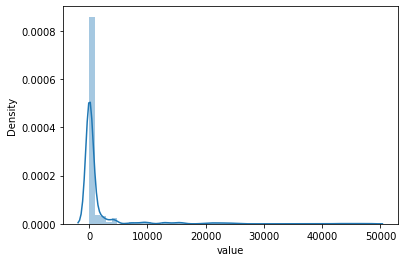

In [12]:
sns.distplot(dataset['value'])

In [13]:
dataset['value'].describe()

count    42884.000000
mean      1558.392087
std       5301.924443
min          0.297793
25%          3.946621
50%         31.425560
75%        398.816981
max      48463.030170
Name: value, dtype: float64

### Comparing Rubel(Russian) currency with every other country and exchange rate trend of other countries


In [14]:
numerical_features = dataset[(dataset["currency"] !="RUB")]['value']
print(numerical_features)
Russian_currency = dataset[(dataset["currency"] == "RUB")]['value']
print(Russian_currency)
US_currency = dataset[(dataset["currency"] == "USD")]['value']
print(US_currency)


0            1.581627
1            0.851619
2            1.000000
3          128.301759
4            1.041015
             ...     
42879        3.533471
42880      114.443646
42881    22823.912680
42882      240.865646
42883     8659.322128
Name: value, Length: 42598, dtype: float64
115      83.646015
265      83.357348
415      83.357348
565      83.647292
715      83.602695
           ...    
42249    60.502092
42399    56.078811
42549    56.078811
42699    55.459533
42849    56.278541
Name: value, Length: 286, dtype: float64
5        1.132548
155      1.123810
305      1.123810
455      1.124405
605      1.128382
           ...   
42139    0.983816
42289    0.968964
42439    0.968964
42589    0.968734
42739    0.962020
Name: value, Length: 286, dtype: float64


### Ploting Russian currency exchange rate


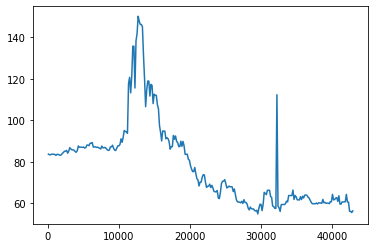

In [15]:
plt.plot(Russian_currency)
plt.show()

### Ploting US_currency exchange rate

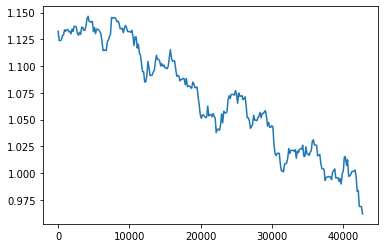

In [16]:
plt.plot(US_currency)
plt.show()

### The fall of US economy is visible as it started from 2019 covid pandemic and continues to fall because of war as the glimpse of recession is visible. This is the analysis of the above code

### Ploting the exchange rate of all countries other than Russian_currency

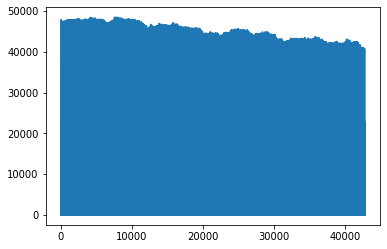

In [17]:
plt.plot(numerical_features)
plt.show()

### Trend of top 7 developed countries


In [18]:
x = dataset[dataset.currency.isin(['AUD','GBP','EUR','USD','CHF','RUB','JPY'])]
print((x))

          Country/Currency currency       value       date    month
0         Australia Dollar      AUD    1.581627 2021-12-17  2021-12
1      Great Britain Pound      GBP    0.851619 2021-12-17  2021-12
2                     Euro      EUR    1.000000 2021-12-17  2021-12
3                Japan Yen      JPY  128.301759 2021-12-17  2021-12
4        Switzerland Franc      CHF    1.041015 2021-12-17  2021-12
...                    ...      ...         ...        ...      ...
42736                 Euro      EUR    1.000000 2022-09-27  2022-09
42737            Japan Yen      JPY  138.973817 2022-09-27  2022-09
42738    Switzerland Franc      CHF    0.954655 2022-09-27  2022-09
42739           USA Dollar      USD    0.962020 2022-09-27  2022-09
42849        Russia Rouble      RUB   56.278541 2022-09-27  2022-09

[2000 rows x 5 columns]


### Creating a month column and ploting them


C:\Users\91949\AppData\Local\Temp\ipykernel_15436\3515268031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['month'] = x['date'].dt.strftime('%Y-%m')


<AxesSubplot:xlabel='month'>

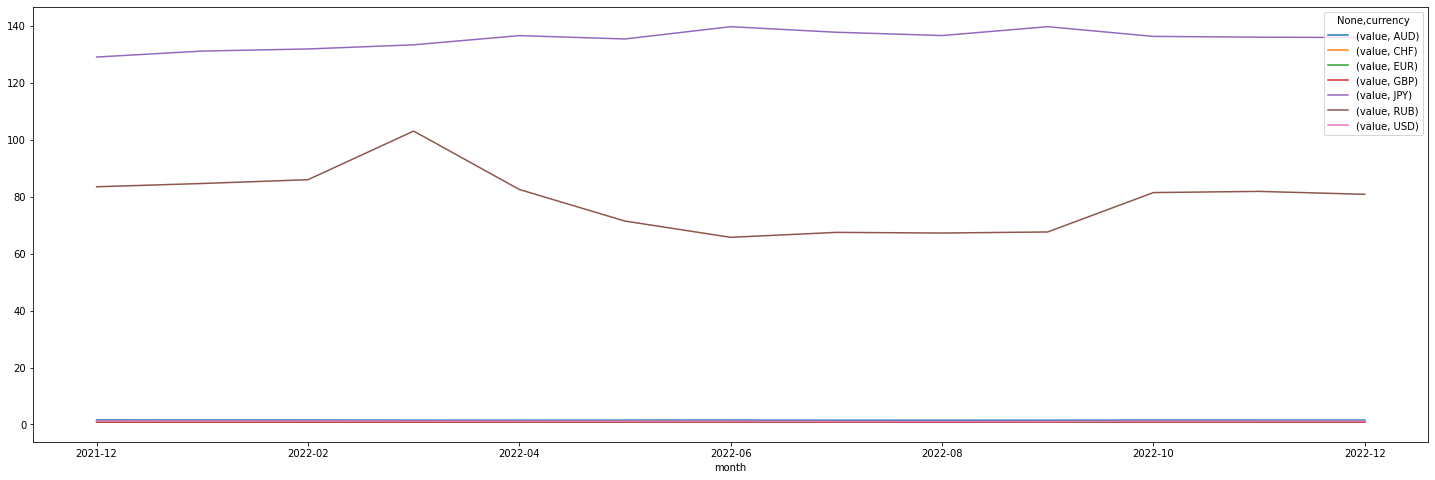

In [19]:
x['month'] = x['date'].dt.strftime('%Y-%m')
month_average_excg_rate = x.groupby(['month','currency']).mean().unstack()
month_average_excg_rate.plot(figsize=(25,8))

### japan's currency is stable even during pandemic and war and russia currency has a little bit of unbalanced. This is the analysis of the above code

        Country/Currency currency     value       date    month
4      Switzerland Franc      CHF  1.041015 2021-12-17  2021-12
5             USA Dollar      USD  1.132548 2021-12-17  2021-12
154    Switzerland Franc      CHF  1.038702 2021-12-18  2021-12
155           USA Dollar      USD  1.123810 2021-12-18  2021-12
304    Switzerland Franc      CHF  1.038702 2021-12-19  2021-12
...                  ...      ...       ...        ...      ...
42439         USA Dollar      USD  0.968964 2022-09-25  2022-09
42588  Switzerland Franc      CHF  0.951786 2022-09-26  2022-09
42589         USA Dollar      USD  0.968734 2022-09-26  2022-09
42738  Switzerland Franc      CHF  0.954655 2022-09-27  2022-09
42739         USA Dollar      USD  0.962020 2022-09-27  2022-09

[572 rows x 5 columns]


C:\Users\91949\AppData\Local\Temp\ipykernel_15436\1640771620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['month'] = x['date'].dt.strftime('%Y-%m')


<AxesSubplot:xlabel='month'>

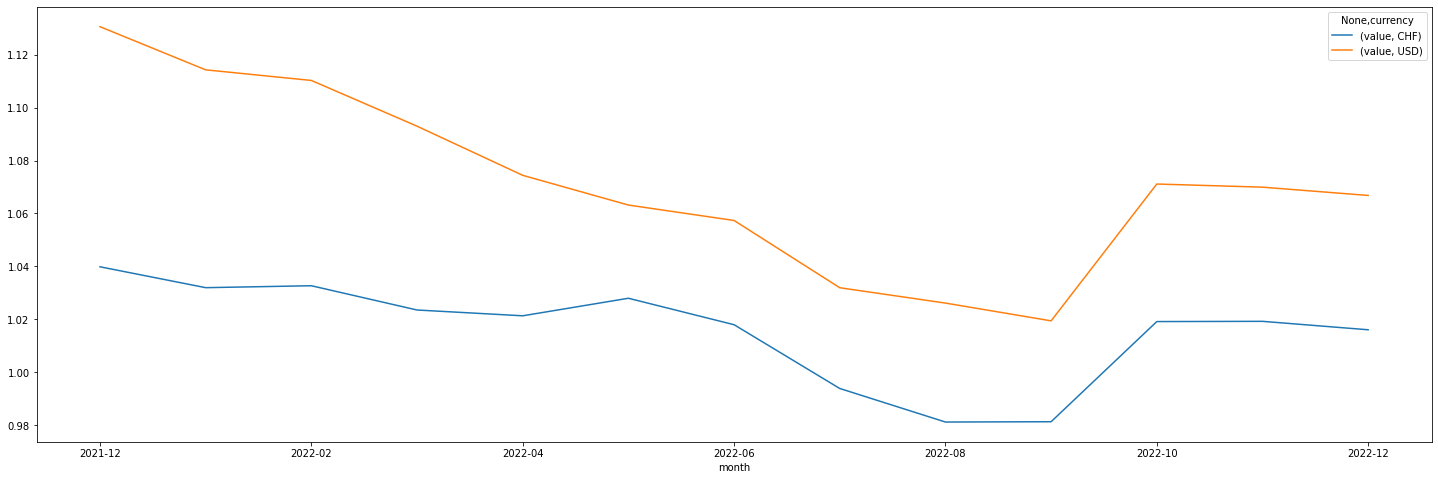

In [20]:
x = dataset[dataset.currency.isin(['USD','CHF'])]
print((x))
x['month'] = x['date'].dt.strftime('%Y-%m')
month_average_excg_rate = x.groupby(['month','currency']).mean().unstack()
month_average_excg_rate.plot(figsize=(25,8))

###  Switzerland and UnitedStates both fall at the same time and gets inclined at the same time but the fall of US is higher than the fall of Switzerland.This is the analysis of the above code

          Country/Currency currency     value       date    month
1      Great Britain Pound      GBP  0.851619 2021-12-17  2021-12
2                     Euro      EUR  1.000000 2021-12-17  2021-12
151    Great Britain Pound      GBP  0.848382 2021-12-18  2021-12
152                   Euro      EUR  1.000000 2021-12-18  2021-12
301    Great Britain Pound      GBP  0.848382 2021-12-19  2021-12
...                    ...      ...       ...        ...      ...
42436                 Euro      EUR  1.000000 2022-09-25  2022-09
42585  Great Britain Pound      GBP  0.896471 2022-09-26  2022-09
42586                 Euro      EUR  1.000000 2022-09-26  2022-09
42735  Great Britain Pound      GBP  0.894120 2022-09-27  2022-09
42736                 Euro      EUR  1.000000 2022-09-27  2022-09

[570 rows x 5 columns]


C:\Users\91949\AppData\Local\Temp\ipykernel_15436\3622464936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['month'] = x['date'].dt.strftime('%Y-%m')


<AxesSubplot:xlabel='month'>

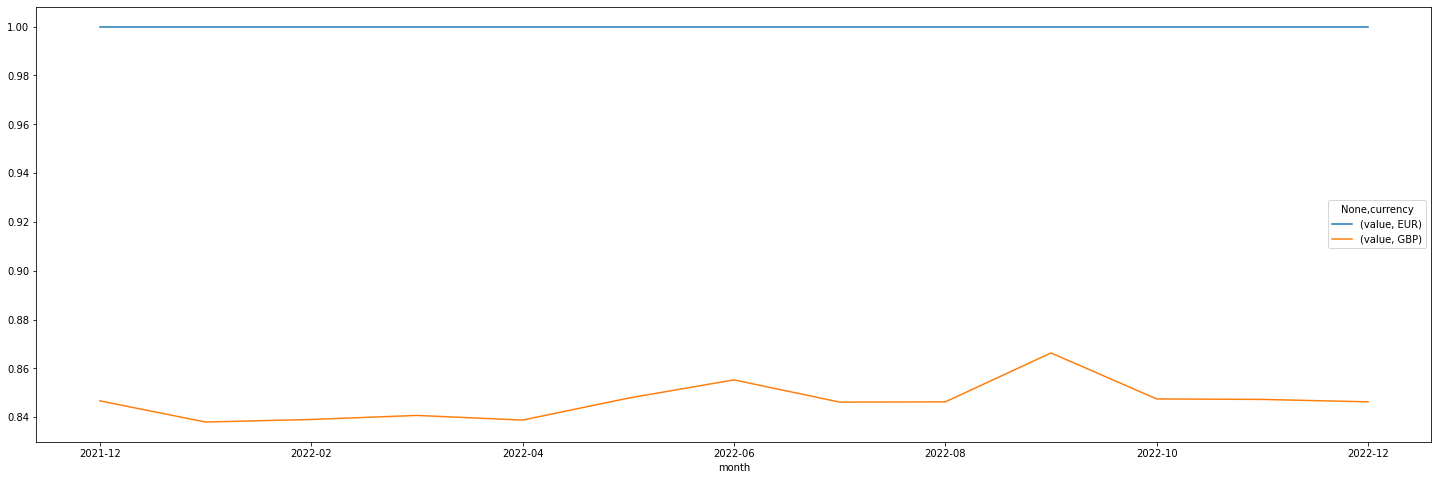

In [21]:
x = dataset[dataset.currency.isin(['GBP','EUR'])]
print((x))
x['month'] = x['date'].dt.strftime('%Y-%m')
month_average_excg_rate = x.groupby(['month','currency']).mean().unstack()
month_average_excg_rate.plot(figsize=(25,8))

### Euros currency's exchange rate is stable but britain exchange rate is little unstable.This is the analysis of the above code